In [1]:
# Retail Sales Analysis with Seasonal Trends & Marketing
# Import the file as the data set


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose




In [8]:
df = pd.read_csv("retail_sales.csv")

In [32]:
# Combine YEAR + MONTH into a single DATE
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str) + '-01')


In [33]:
print(df.head())          # first few rows

   YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                  BOOTLEG RED - 750ML      WINE          0.00   
1            MOMENT DE PLAISIR - 750ML      WINE          0.00   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER          0.00   
3        SCHLINK HAUS KABINETT - 750ML      WINE          0.00   
4       SANTORINI GAVALA WHITE - 750ML      WINE          0.82   

   RETAIL TRANSFERS  WAREHOUSE SALES       DATE  
0               0.0              2.0 2020-01-01  
1               1.0              4.0 2020-01-01  
2               0.0              1.0 2020-01-01  
3               0.0     

In [34]:
print(df.info())          # data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   YEAR              30000 non-null  int64         
 1   MONTH             30000 non-null  int64         
 2   SUPPLIER          29967 non-null  object        
 3   ITEM CODE         30000 non-null  object        
 4   ITEM DESCRIPTION  30000 non-null  object        
 5   ITEM TYPE         30000 non-null  object        
 6   RETAIL SALES      29999 non-null  float64       
 7   RETAIL TRANSFERS  30000 non-null  float64       
 8   WAREHOUSE SALES   30000 non-null  float64       
 9   DATE              30000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 2.3+ MB
None


In [35]:
print(df.describe())      # summary stats for numbers

          YEAR         MONTH  RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES  \
count  30000.0  30000.000000  29999.000000      30000.000000     30000.000000   
mean    2020.0      3.911467      6.939796          6.594058        27.431031   
min     2020.0      1.000000     -0.420000         -6.000000     -3999.000000   
25%     2020.0      1.000000      0.000000          0.000000         0.000000   
50%     2020.0      3.000000      0.160000          0.000000         1.000000   
75%     2020.0      7.000000      2.920000          3.000000         6.000000   
max     2020.0      9.000000   2739.000000       1507.000000     18317.000000   
std        0.0      2.836788     33.081054         27.879428       272.166085   

                                DATE  
count                          30000  
mean   2020-03-29 05:39:27.360000256  
min              2020-01-01 00:00:00  
25%              2020-01-01 00:00:00  
50%              2020-03-01 00:00:00  
75%              2020-07-01 00:00:00

In [36]:
# Group by DATE and sum Retail Sales
sales_trend = df.groupby("DATE")["RETAIL SALES"].sum()

In [37]:
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

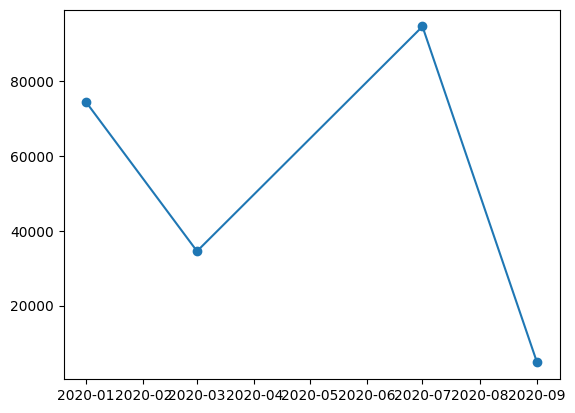

In [38]:
plt.plot(sales_trend.index, sales_trend.values, marker='o')

Text(0.5, 1.0, 'Total Retail Sales Over Time')

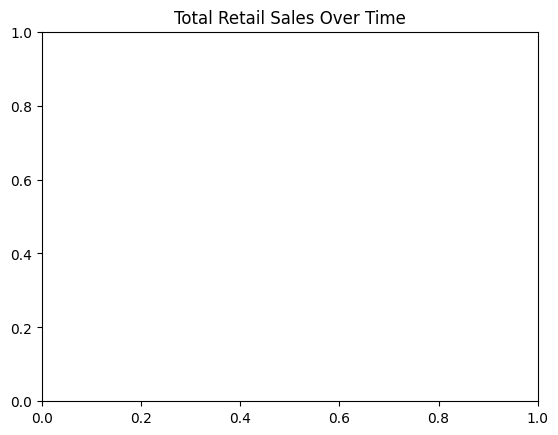

In [40]:
plt.title("Total Retail Sales Over Time")


Text(0.5, 0, 'Date')

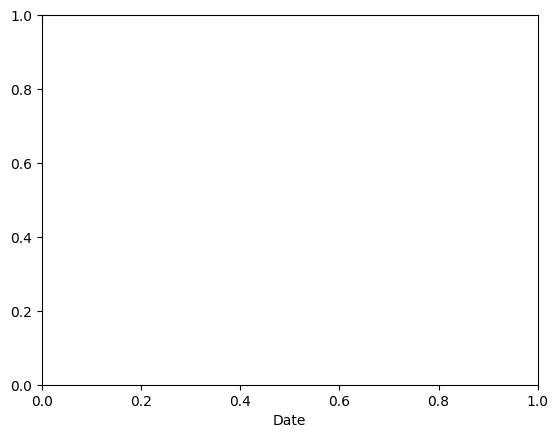

In [41]:
plt.xlabel("Date")


Text(0, 0.5, 'Retail Sales')

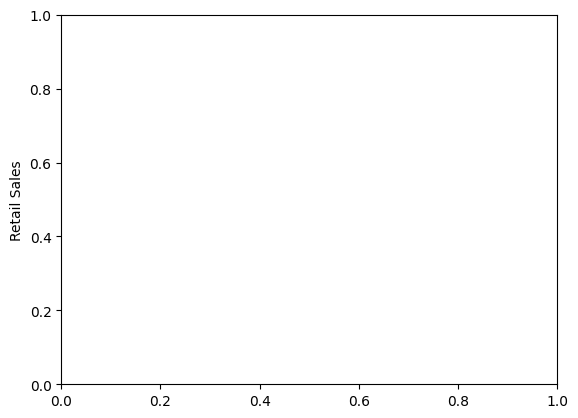

In [42]:
plt.ylabel("Retail Sales")


In [45]:
plt.show()

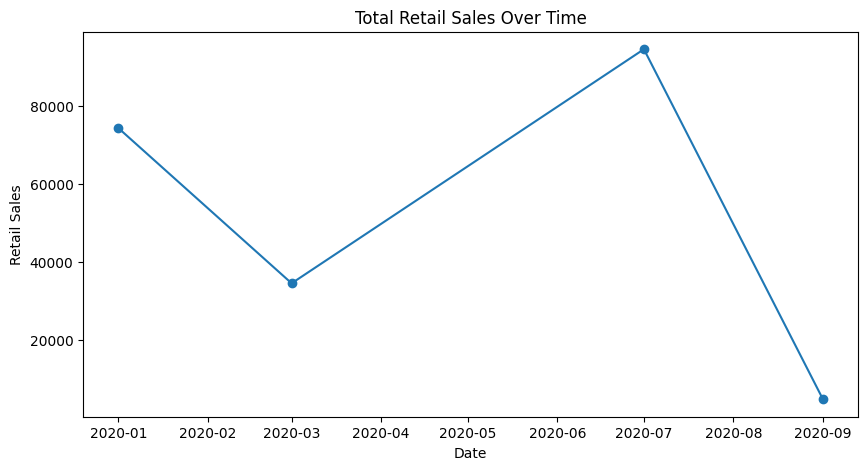

In [64]:
sales_trend = df.groupby("DATE")["RETAIL SALES"].sum()

plt.figure(figsize=(10,5))
plt.plot(sales_trend.index, sales_trend.values, marker='o')
plt.title("Total Retail Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Retail Sales")
plt.show()

In [46]:
# Average sales by month

In [47]:
monthly_sales = df.groupby("MONTH")["RETAIL SALES"].mean()

In [48]:
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='MONTH'>

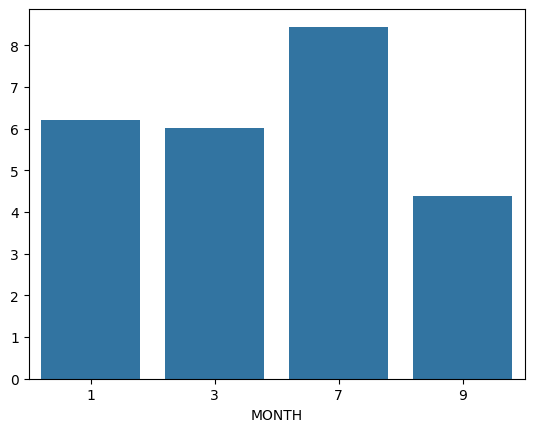

In [49]:
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)

Text(0.5, 1.0, 'Average Retail Sales by Month (Seasonality)')

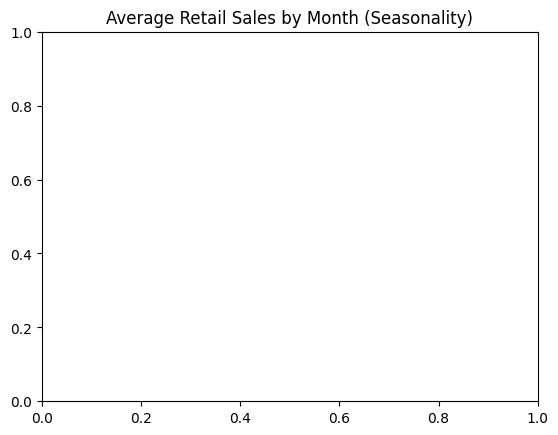

In [50]:
plt.title("Average Retail Sales by Month (Seasonality)")

Text(0.5, 0, 'Month')

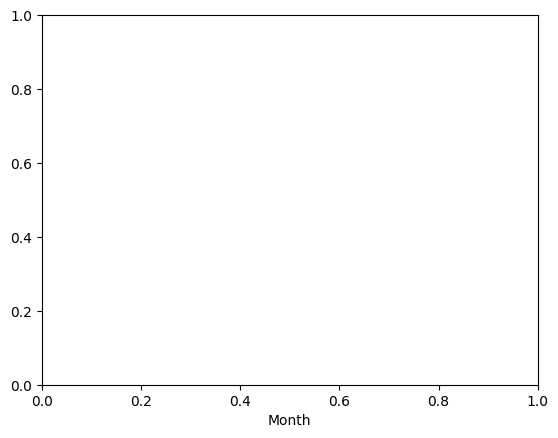

In [51]:
plt.xlabel("Month")

Text(0, 0.5, 'Average Sales')

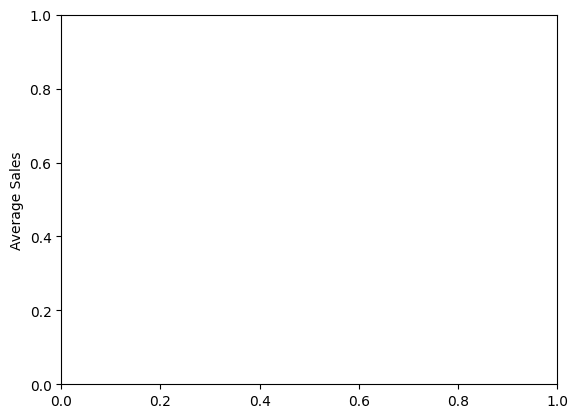

In [52]:
plt.ylabel("Average Sales")

In [57]:
plt.show('MONTH')

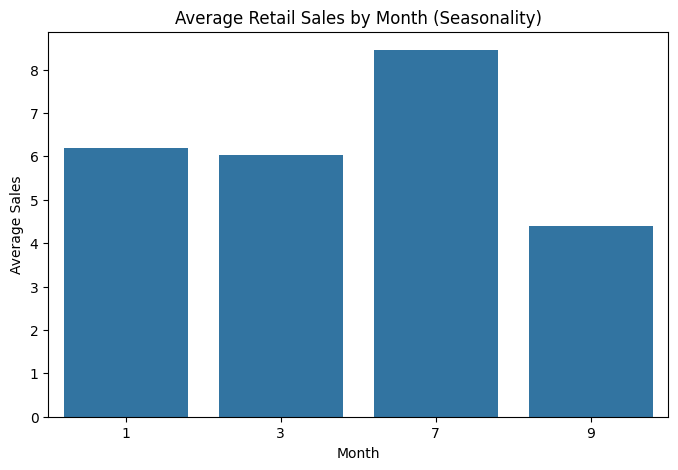

In [63]:
monthly_sales = df.groupby("MONTH")["RETAIL SALES"].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Average Retail Sales by Month (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.show()

In [54]:
supplier_sales = df.groupby("SUPPLIER")["RETAIL SALES"].sum().sort_values(ascending=False)

In [55]:
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='SUPPLIER'>

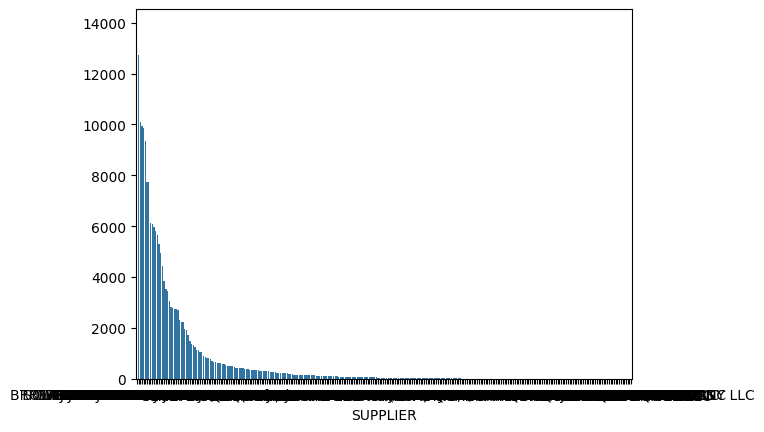

In [56]:
sns.barplot(x=supplier_sales.index, y=supplier_sales.values)

Text(0.5, 1.0, 'Total Retail Sales by Supplier')

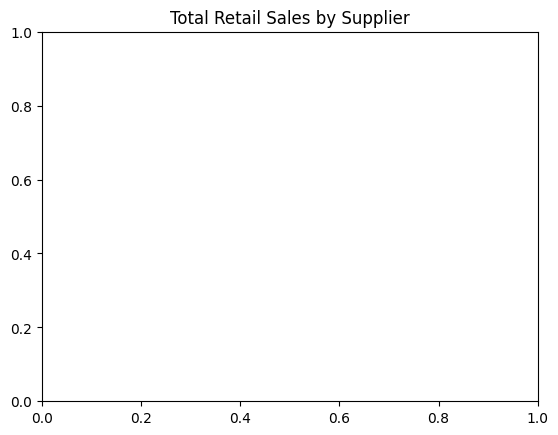

In [58]:
plt.title("Total Retail Sales by Supplier")

Text(0.5, 0, 'Supplier')

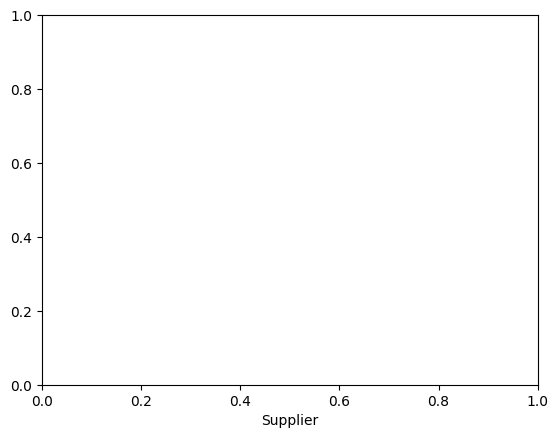

In [59]:
plt.xlabel("Supplier")

Text(0, 0.5, 'Sales')

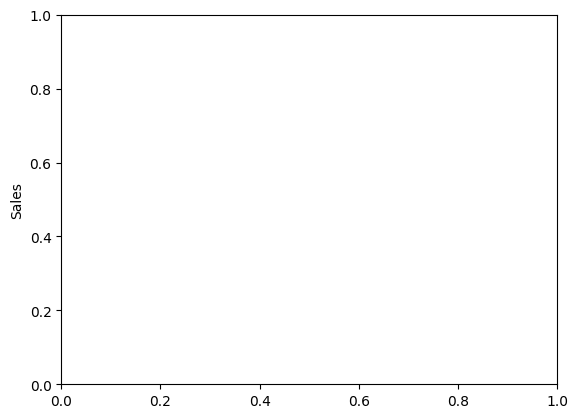

In [60]:
plt.ylabel("Sales")

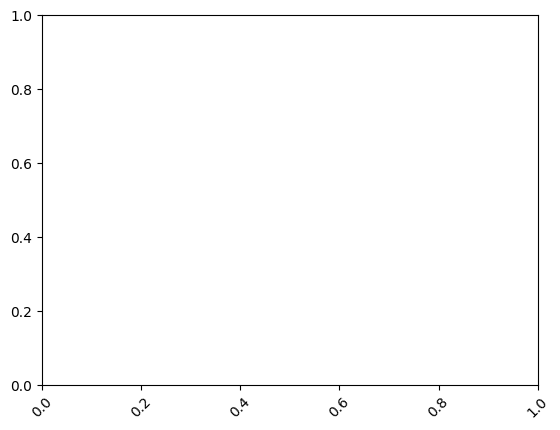

In [61]:
plt.xticks(rotation=45)
plt.show()

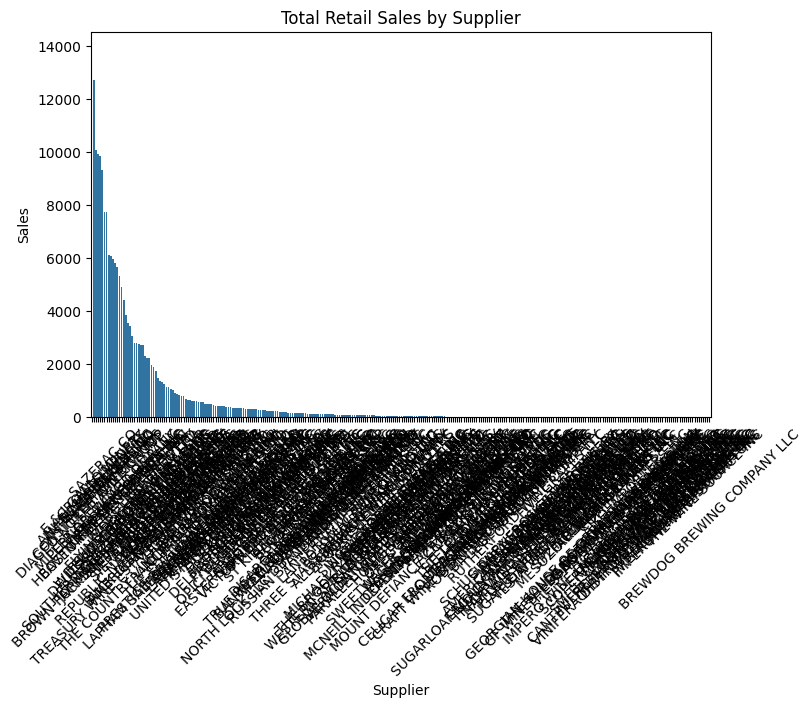

In [62]:
supplier_sales = df.groupby("SUPPLIER")["RETAIL SALES"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=supplier_sales.index, y=supplier_sales.values)
plt.title("Total Retail Sales by Supplier")
plt.xlabel("Supplier")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

In [65]:
df_grouped = df.groupby("DATE")[["RETAIL SALES", "WAREHOUSE SALES"]].sum()


In [66]:
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

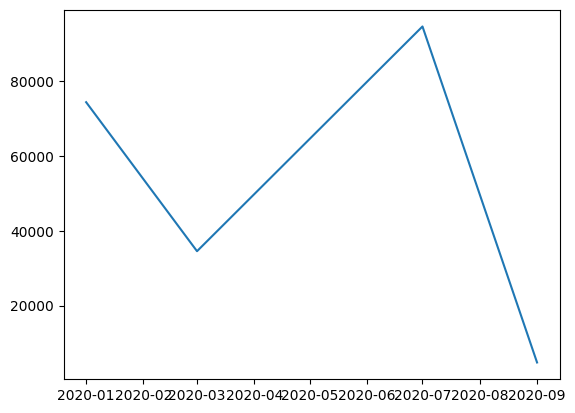

In [67]:
plt.plot(df_grouped.index, df_grouped["RETAIL SALES"], label="Retail Sales")

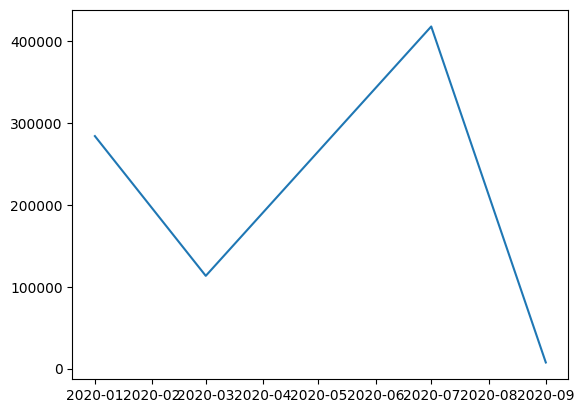

In [68]:
plt.plot(df_grouped.index, df_grouped["WAREHOUSE SALES"], label="Warehouse Sales")

Text(0.5, 1.0, 'Retail vs Warehouse Sales Over Time')

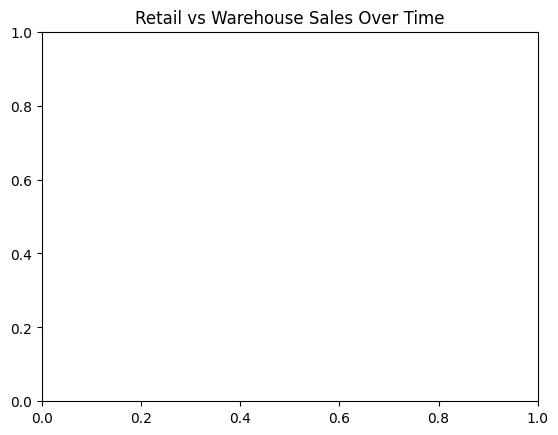

In [69]:
plt.title("Retail vs Warehouse Sales Over Time")

Text(0.5, 0, 'Date')

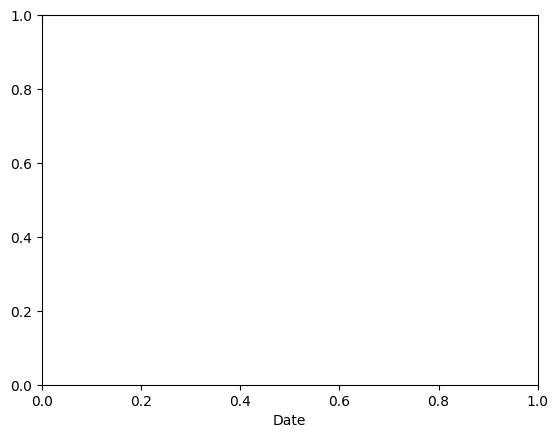

In [70]:
plt.xlabel("Date")

Text(0, 0.5, 'Sales')

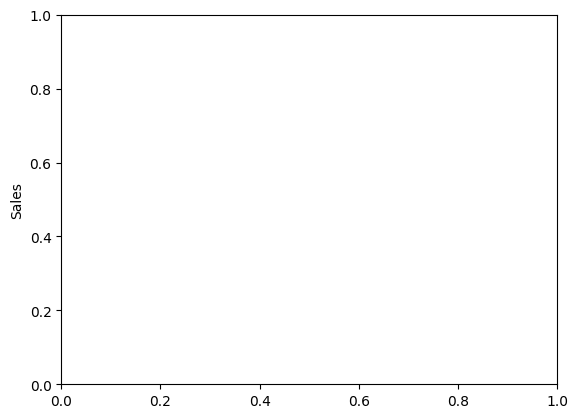

In [71]:
plt.ylabel("Sales")

/tmp/ipython-input-4061938096.py:1: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


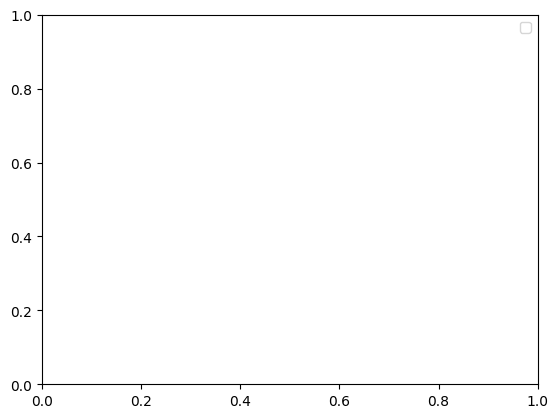

In [72]:
plt.legend()

In [73]:
plt.show()

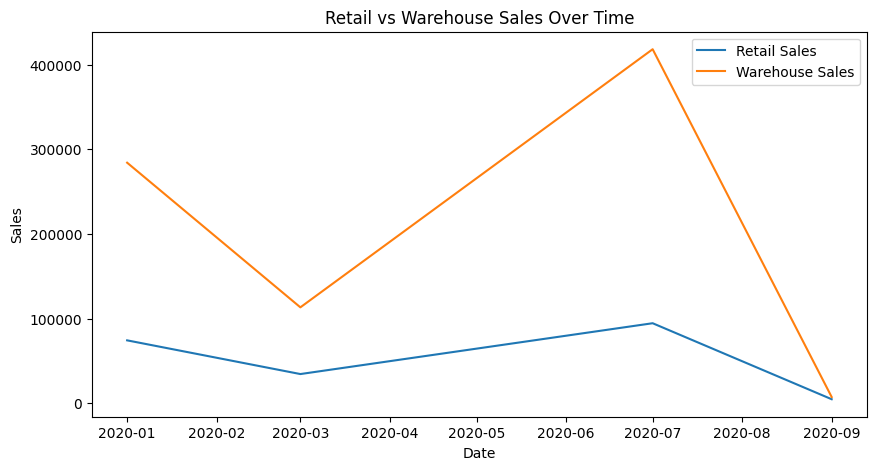

In [74]:
df_grouped = df.groupby("DATE")[["RETAIL SALES", "WAREHOUSE SALES"]].sum()

plt.figure(figsize=(10,5))
plt.plot(df_grouped.index, df_grouped["RETAIL SALES"], label="Retail Sales")
plt.plot(df_grouped.index, df_grouped["WAREHOUSE SALES"], label="Warehouse Sales")
plt.title("Retail vs Warehouse Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()